# Import libraries

In [15]:
import os
from re import search
from dfply import *

# Load settings

In [16]:
if search("ricard", os.uname()[1]):
    exec(open('/Users/ricard/gastrulation_multiome_10x/settings.py').read())
    exec(open('/Users/ricard/gastrulation_multiome_10x/utils.py').read())
elif search("ebi", os.uname()[1]):
    exec(open('/homes/ricard/gastrulation_multiome_10x/settings.py').read())
    exec(open('/homes/ricard/gastrulation_multiome_10x/utils.py').read())
else:
    exit("Computer not recognised")

## Define I/O

In [17]:
io["outdir"] = io["basedir"] + "/..."

## Define options 

scanpy options

In [18]:
# %%capture
# sc.settings.verbosity = 3
# sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(8, 7), facecolor='white')

In [19]:
opts["samples"] = [
	"E7.5_rep1",
	"E7.5_rep2",
	"E8.0_rep1",
	"E8.0_rep2",
	"E8.5_rep1",
	"E8.5_rep2"
]

opts["celltypes"] = [
   # "Epiblast",
   # "Primitive_Streak",
   # "Caudal_epiblast",
   # "PGC",
   # "Anterior_Primitive_Streak",
   # "Notochord",
   # "Def._endoderm",
   # "Gut",
   # "Nascent_mesoderm",
   "Mixed_mesoderm",
   # "Intermediate_mesoderm",
   # "Caudal_Mesoderm",
   # "Paraxial_mesoderm",
   # "Somitic_mesoderm",
   # "Pharyngeal_mesoderm",
   # "Cardiomyocytes",
   # "Allantois",
   # "ExE_mesoderm",
   # "Mesenchyme",
   "Haematoendothelial_progenitors",
   "Endothelium",
   "Blood_progenitors_1",
   "Blood_progenitors_2",
   "Erythroid1",
   "Erythroid2",
   "Erythroid3"
   # "NMP",
   # "Rostral_neurectoderm",
   # "Caudal_neurectoderm",
   # "Neural_crest",
   # "Forebrain_Midbrain_Hindbrain",
   # "Spinal_cord",
   # "Surface_ectoderm",
   # "Visceral_endoderm",
   # "ExE_endoderm",
   # "ExE_ectoderm",
   # "Parietal_endoderm"
]

## Load cell metadata

In [20]:
metadata = (pd.read_table(io["metadata"]) >>
    mask(X.doublet_call==False, X["sample"].isin(opts["samples"]), X["celltype.mapped"].isin(opts["celltypes"]))
)
metadata.shape

(3852, 22)

In [21]:
metadata.head()

,cell,sample,barcode,stage,nFeature_RNA,nCount_RNA,mitochondrial_percent_RNA,ribosomal_percent_RNA,pass_rnaQC,celltype.mapped,...,hybrid_score,doublet_call,TSSEnrichment_atac,ReadsInTSS_atac,PromoterRatio_atac,NucleosomeRatio_atac,nFrags_atac,BlacklistRatio_atac,pass_atacQC,celltype.predicted
10,E7.5_rep1#AAACATGCAGGATAAC-1,E7.5_rep1,AAACATGCAGGATAAC-1,E7.5,4157.0,11544.0,11.633749,5.621968,True,Blood_progenitors_1,...,0.243787,False,15.723,397.0,0.209673,2.081127,3608.0,0.017600,True,Blood_progenitors_1
22,E7.5_rep1#AAACCGGCAACCTAAT-1,E7.5_rep1,AAACCGGCAACCTAAT-1,E7.5,3407.0,8154.0,9.921511,5.469708,True,Haematoendothelial_progenitors,...,0.180916,False,12.705,3734.0,0.177365,1.672081,40800.0,0.016520,True,Haematoendothelial_progenitors
28,E7.5_rep1#AAACGCGCAGGAACAT-1,E7.5_rep1,AAACGCGCAGGAACAT-1,E7.5,4083.0,11181.0,18.942849,7.736338,True,Mixed_mesoderm,...,0.239001,False,11.931,4519.0,0.180515,1.290318,52943.0,0.018888,True,Mixed_mesoderm
43,E7.5_rep1#AAACGTACATGCTCCC-1,E7.5_rep1,AAACGTACATGCTCCC-1,E7.5,4095.0,10422.0,4.883899,5.200537,True,Blood_progenitors_2,...,0.112734,False,NaN,NaN,NaN,NaN,NaN,NaN,False,Blood_progenitors_2
54,E7.5_rep1#AAAGCACCATTTGCTC-1,E7.5_rep1,AAAGCACCATTTGCTC-1,E7.5,2769.0,4824.0,1.907131,5.825041,True,Blood_progenitors_1,...,0.128226,False,10.353,2703.0,0.172957,2.161860,34205.0,0.015173,True,Blood_progenitors_1


# Load anndata object

In [25]:
adata = load_adata(
    adata_file = io["anndata"], 
    cells = metadata.cell.values, 
    normalise = True, 
    filter_lowly_expressed_genes = True
)
adata

AnnData object with n_obs × n_vars = 36822 × 32245
    obs: 'sample', 'stage', 'nFeature_RNA', 'mitochondrial_percent_RNA', 'celltype.mapped'
    var: 'gene'
    uns: 'celltype.mapped_colors', 'stage_colors'

In [40]:
# colPalette_celltypes = [opts["celltype_colors"][i.replace(" ","_")] for i in sorted(np.unique(adata.obs['celltype.mapped']))]
# adata.uns['celltype.mapped_colors'] = colPalette_celltypes
# colPalette_stages = [opts["stages_colors"][i.replace(" ","_")] for i in sorted(np.unique(adata.obs['stage']))]
# adata.uns['stage_colors'] = colPalette_stages

# Dimensionality reduction

## PCA

Run PCA

In [41]:
sc.tl.pca(adata, svd_solver='arpack')

Plot PCA

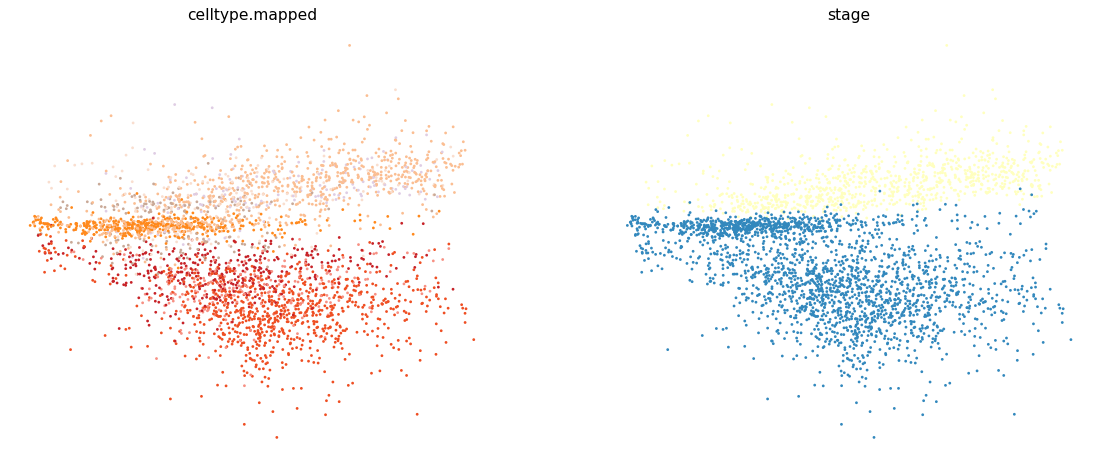

In [42]:
sc.pl.pca(adata, components=[1,2], color=["celltype.mapped","stage"], size=25, legend_loc=None)

## k-NN graph

Build kNN graph

In [43]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=15)

## UMAP

Run UMAP

In [44]:
sc.tl.umap(adata, min_dist=0.5, n_components=2)

Plot UMAP

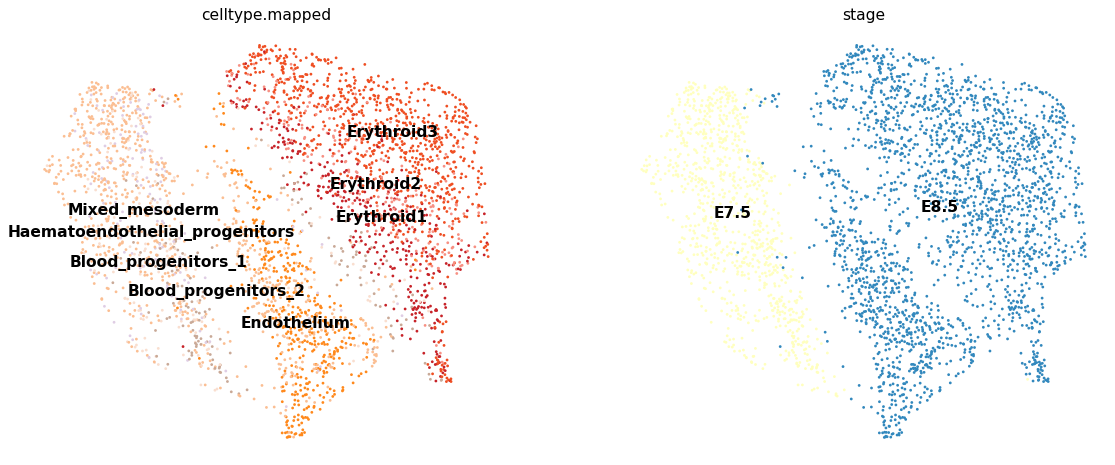

In [48]:
sc.pl.umap(adata, color=["celltype.mapped","stage"], size=25, legend_loc="on data")

## Force-directed layout

In [51]:
sc.tl.draw_graph(adata, layout="fa")

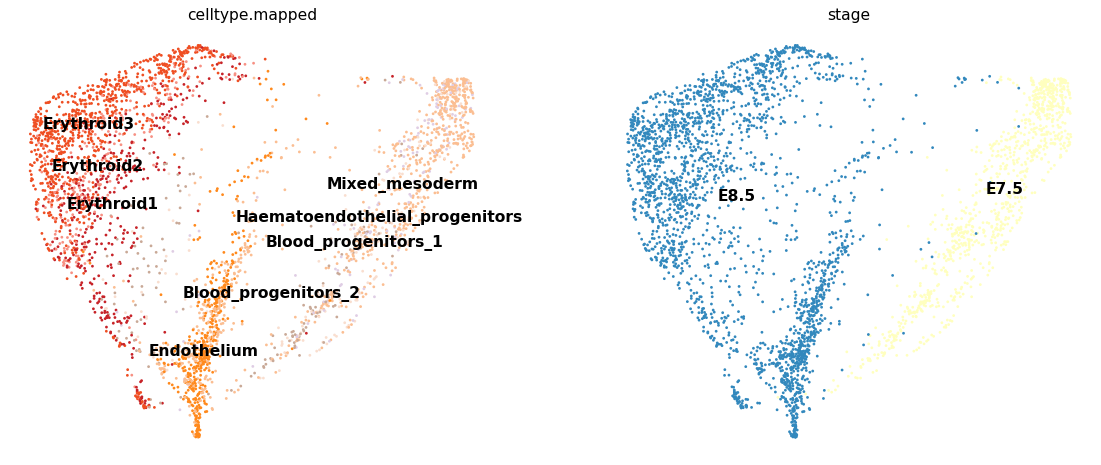

In [52]:
sc.pl.draw_graph(adata, color=["celltype.mapped","stage"], size=25, legend_loc="on data")